## About The Case Study



## Case Study
## Symptoms for specific types of cancer

According to the American Cancer Society (ACS)Trusted Source, the most common sign of breast cancer is a new lump or mass in the breast. People should become familiar with the typical look and feel of their breasts to detect any changes early on.

Breast cancer can develop in males and females, but due to differencesTrusted Source in breast tissue, the disease is much less common in males.

Below, we outline some early indications of breast cancer. We also describe the various types and treatment options. Finally, we look into some benign conditions people may mistake for breast cancer.

### Benign breast conditions
Several benign breast conditions can cause symptoms that resemble those of cancer. Some of these issues require treatment, while others go away on their own.

Though these conditions are benign, they can cause:

discomfort or pain
swelling
lumps
Some common benign breast conditions include:

<b>Cysts:</b> These are fluid-filled sacs that can form in many parts of the body, including the breasts.

<b>Mastitis:</b> This is inflammation (swelling) in the breast that is usually from an infection.

<b>Hyperplasia:</b> This is an overgrowth of cells, particularly in the milk ducts or lobules inside the breast.

<b>Sclerosing adenosis:</b> This is a condition in which lobules enlarge.

<b>Intraductal papillomas:</b> These are benign wart-like tumors that grow within the milk ducts of the breast.

<b>Fibroadenoma:</b> These are common breast tumors that develop when an overgrowth of fibrous or glandular tissue forms around a lobule.

<b>Radial scar:</b> Also called complex sclerosing lesions, these are a core of connective tissue that can resemble breast cancer on a mammogram.

<b>Fat necrosis:</b> This develops following an injury to fatty breast tissue, as can happen following surgery, radiation, or injury to the breast.

<b>Phyllodes tumors:</b> These are fast-growing but typically painless tumors that start in the connective tissue of the breast. Some can be cancerous.


![https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/01/3319-breast-cancer-symptoms-english-1296x728-body.20210323201926188.jpg](https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/01/3319-breast-cancer-symptoms-english-1296x728-body.20210323201926188.jpg)

## Procedure
This kernel uses multiple classification algorithms as below
<ul>
    <li>Multi-layer Perceptron classifier (MLP)</li>
    <li>KNeighborsClassifier</li>
    <li>AdaBoostClassifier</li>
    <li>BaggingClassifier</li>
    <li>GradientBoostingClassifier</li>
    <li>RandomForestClassifier</li>
</ul>
    
Also this kernel does lot of indepth EDA like
<ul>
    <li>univalirate analysis</li>
    <li>bivariate analysis</li>
    <li>correlation analysis</li>
</ul>

This kernel utilize the below methods for evaluation of model accuracy
<ul>
    <li>auc</li>
    <li>classification report</li>
    <li>confusion matrix</li>
</ul>

## General Library Imports

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# libraries for models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

# metrics evaluation libraries
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay

## Data loading

In [5]:
project_data = pd.read_csv("data.csv")
project_data = project_data.drop(columns=["id"]) # droping unwanted columns

## Initial Analysis

In [6]:
project_data.head()

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   Radius_mean              569 non-null    float64
 2   Texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
project_data.describe()

,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.296678,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301816,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.870000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
project_data.shape

(569, 31)

In [10]:
project_data.columns

Index(['diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Null Value Analysis

In [11]:
project_data.isna().sum()

,0
diagnosis,0
Radius_mean,0
Texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


## Eploratory Data Analysis

diagnosis
B    357
M    212
Name: count, dtype: int64


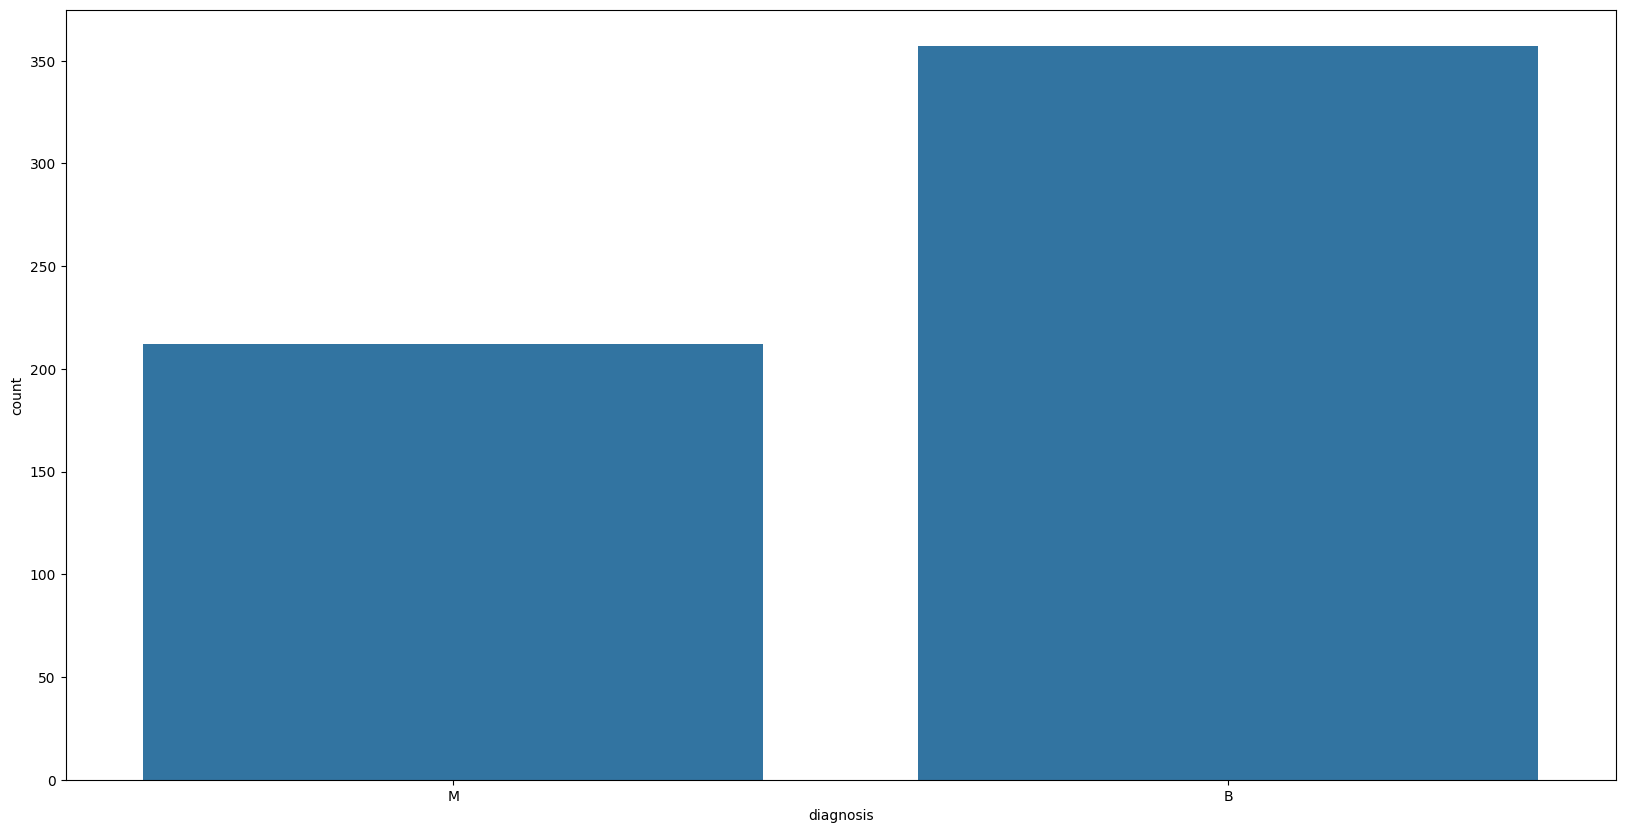

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x=project_data["diagnosis"])
print(project_data["diagnosis"].value_counts())

In [13]:
numeric_columns = [column for column in project_data.columns if project_data[column].dtype == 'float64']
print(numeric_columns)

['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


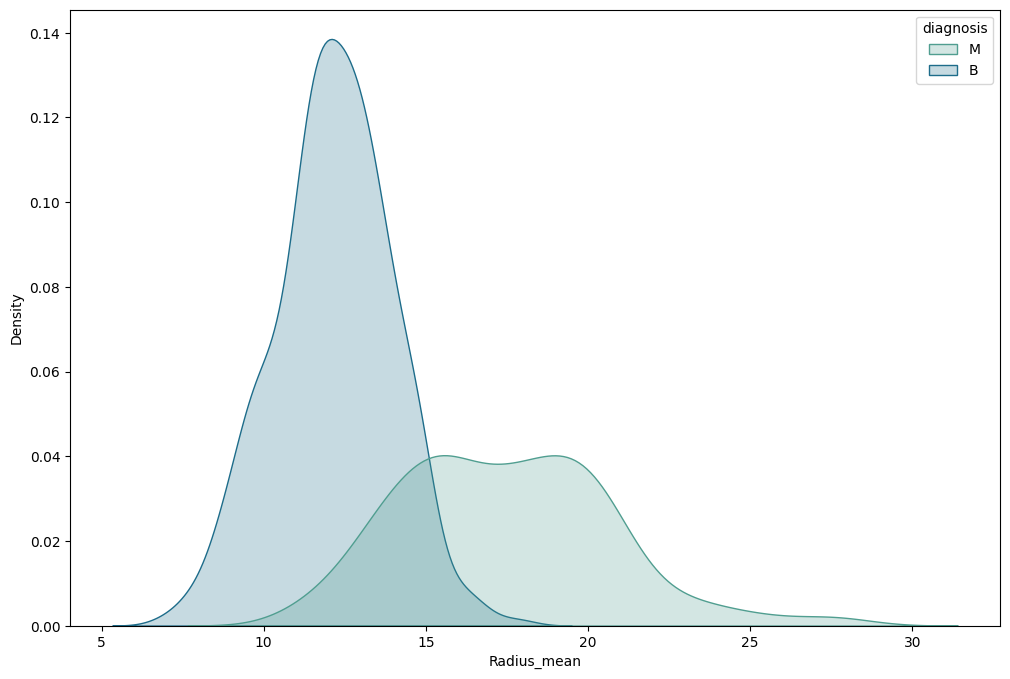

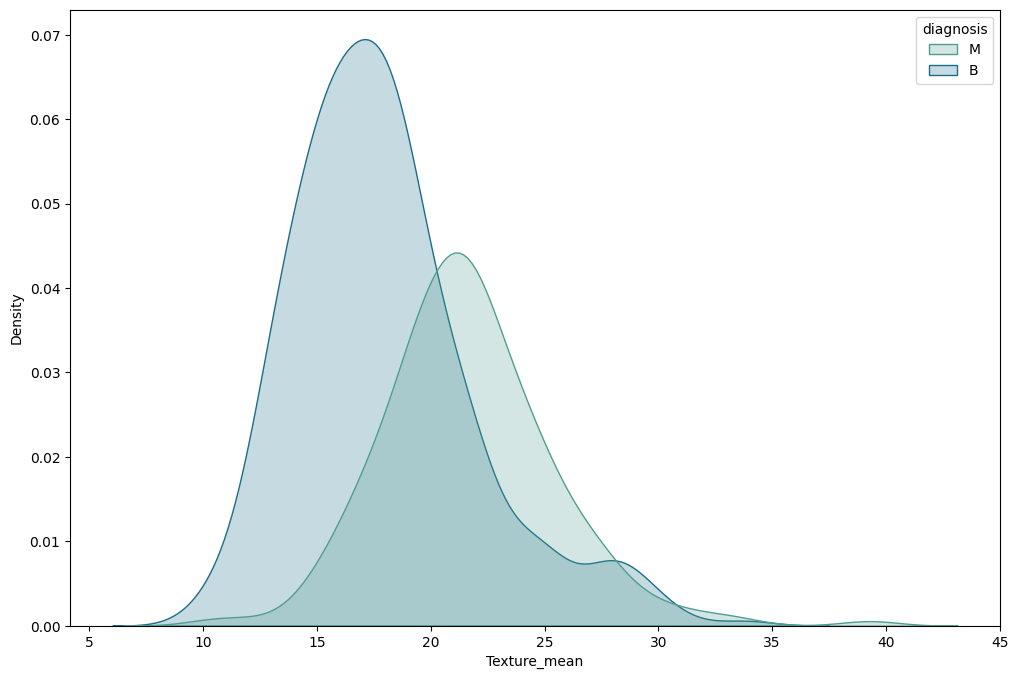

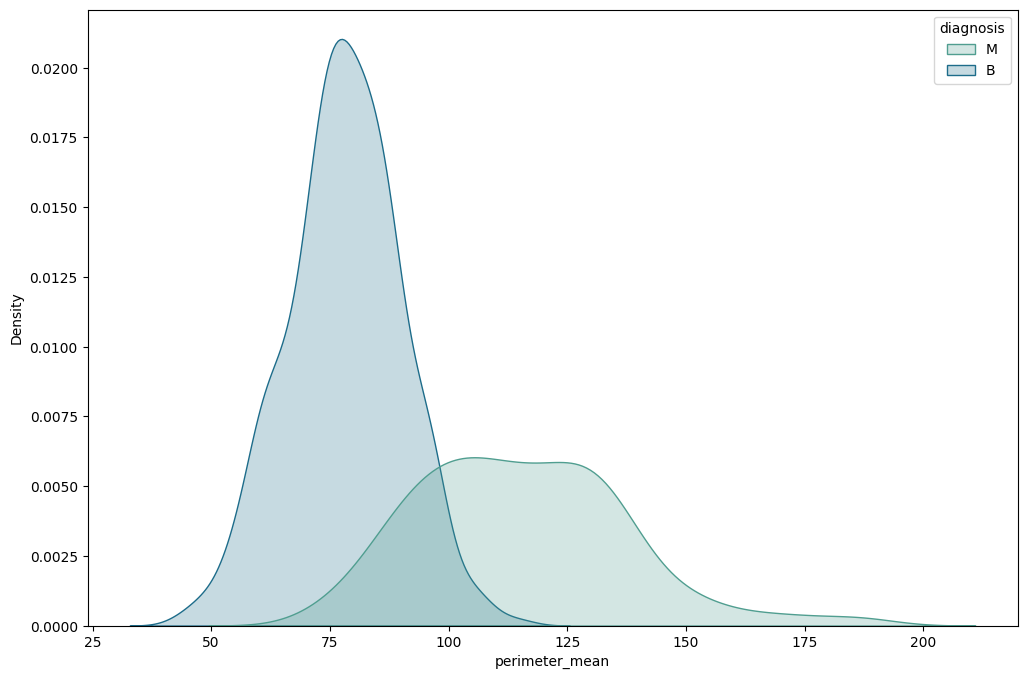

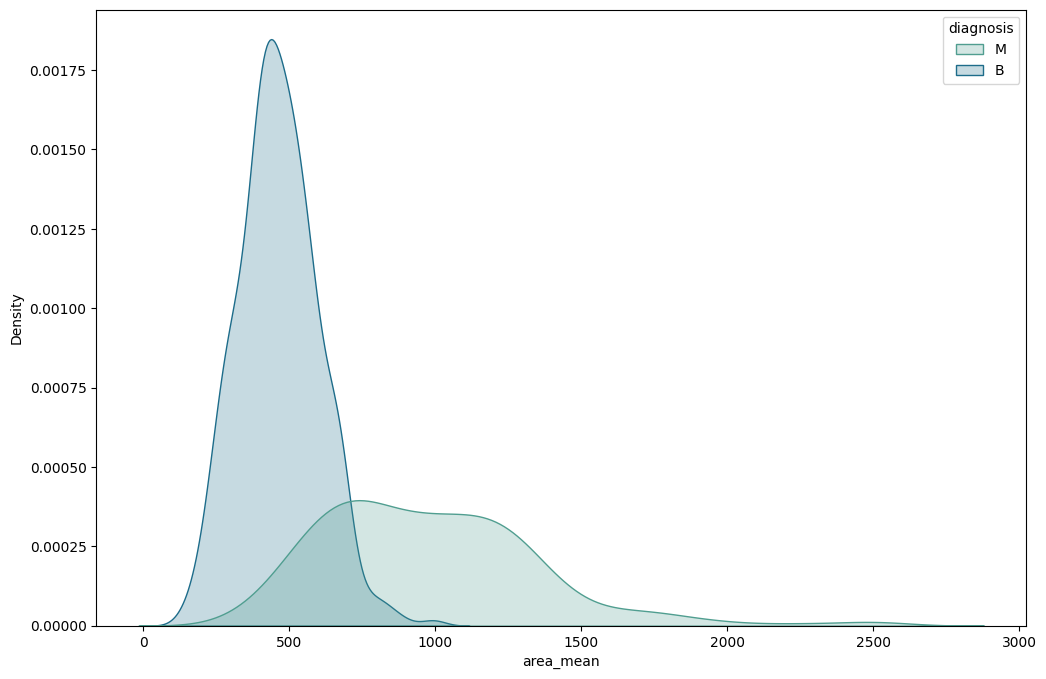

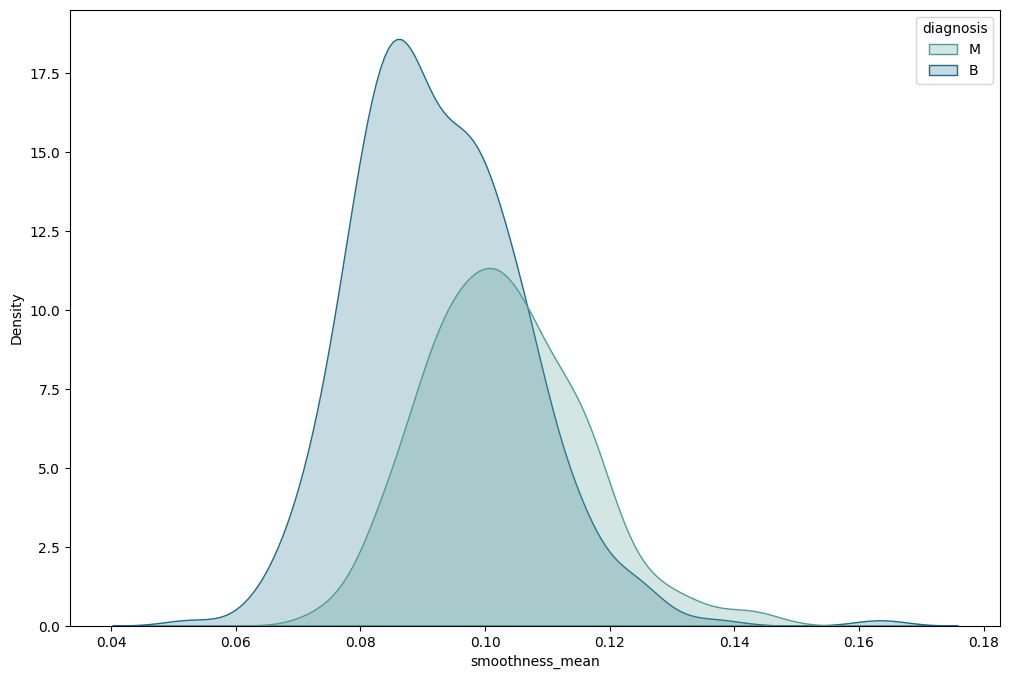

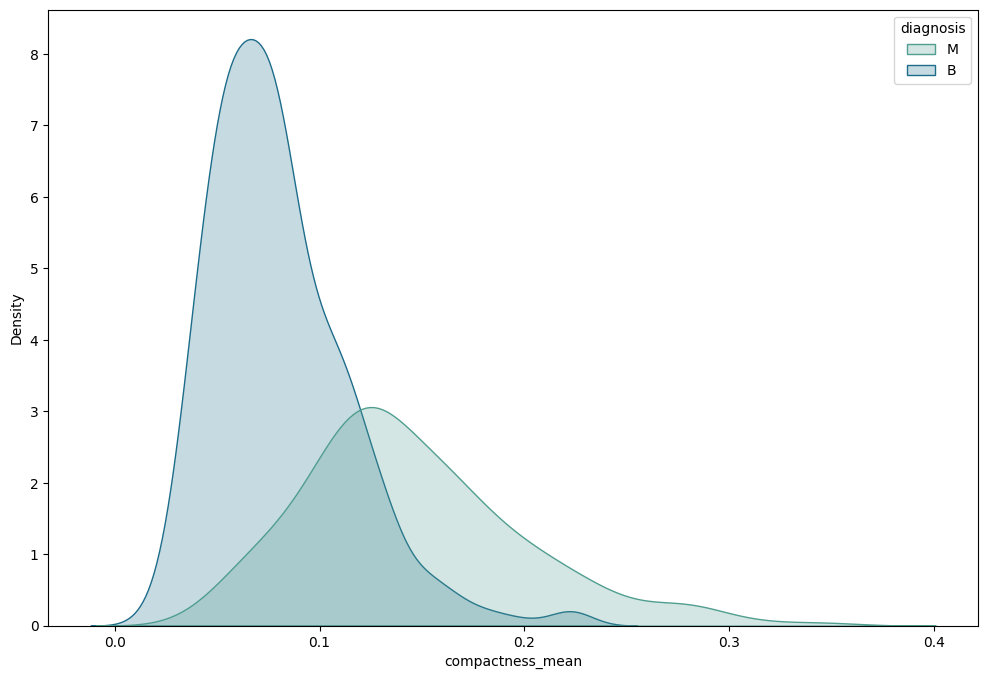

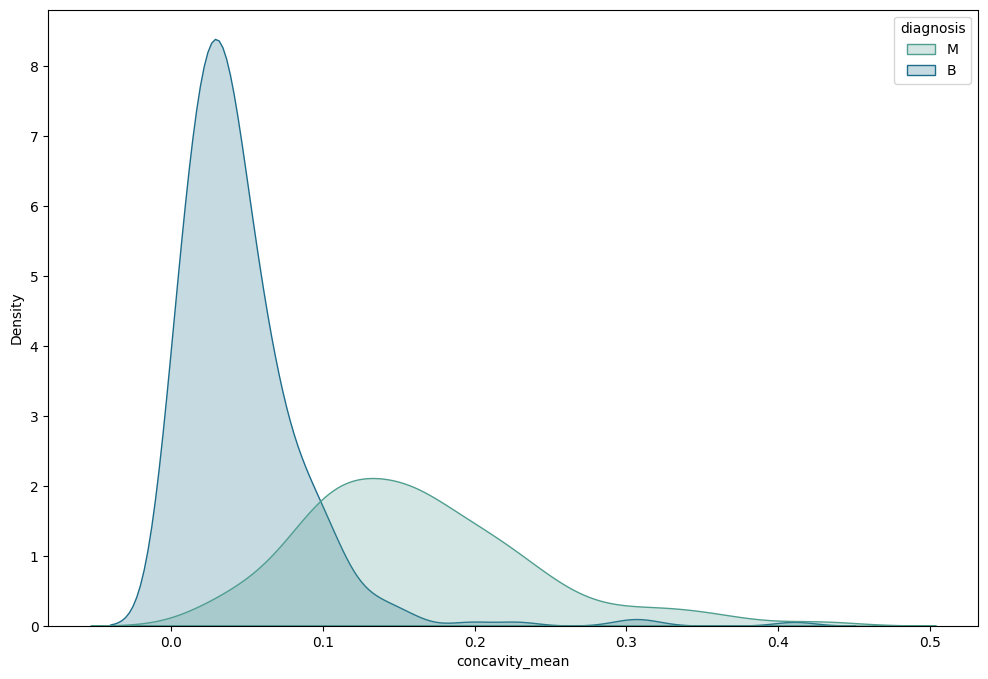

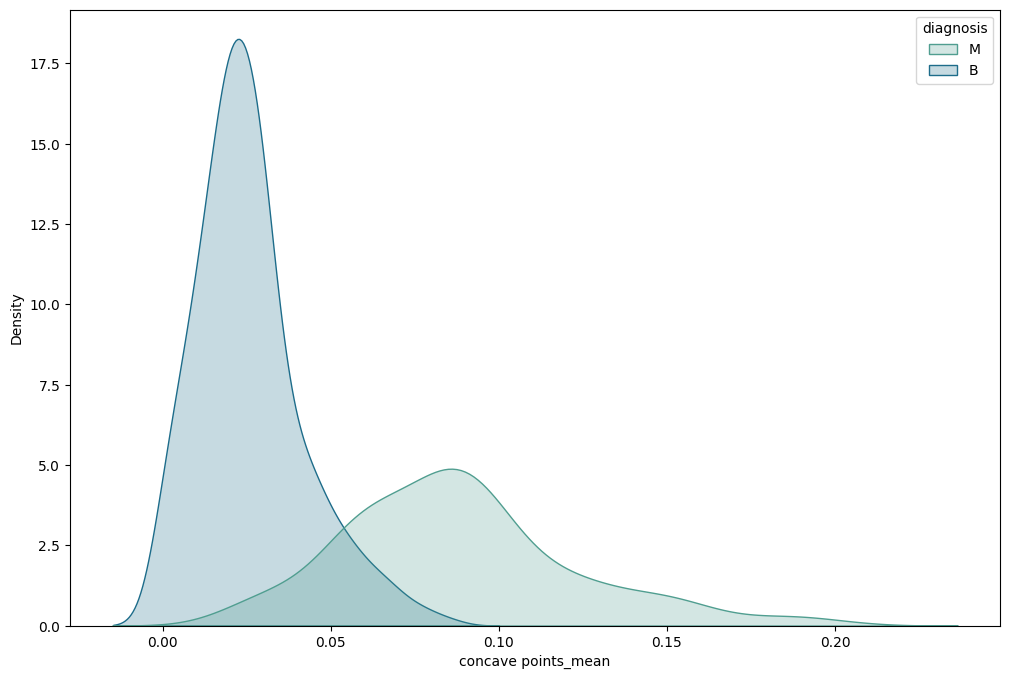

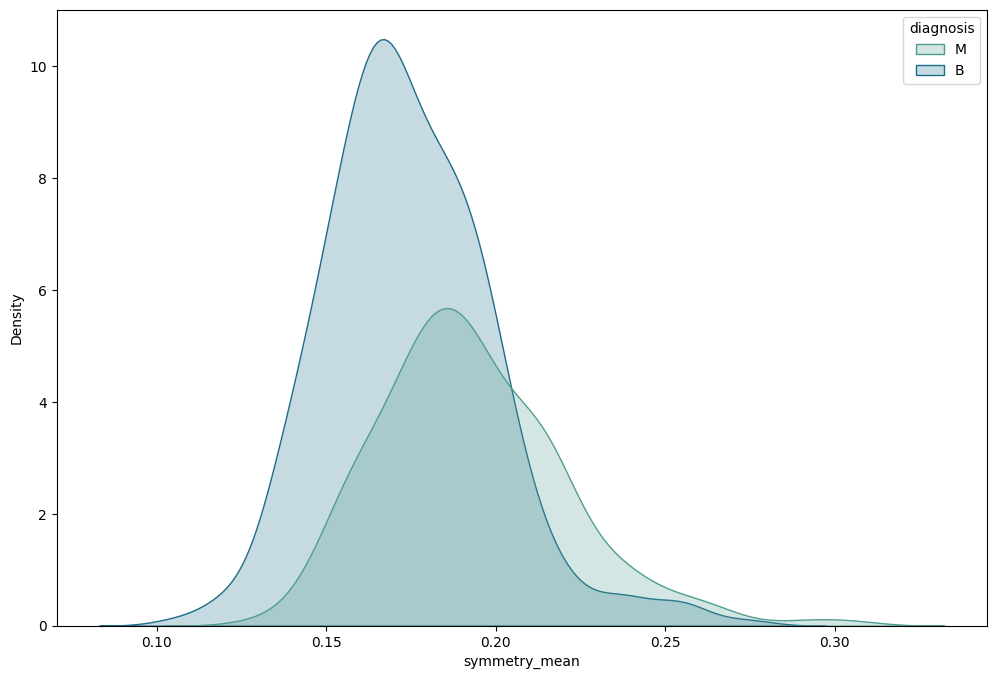

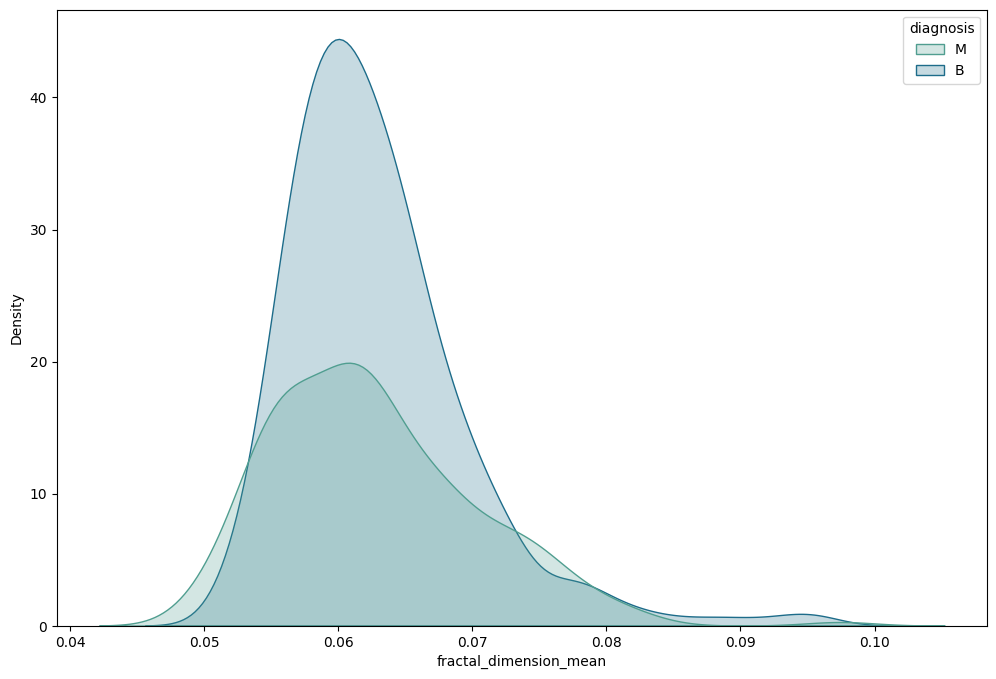

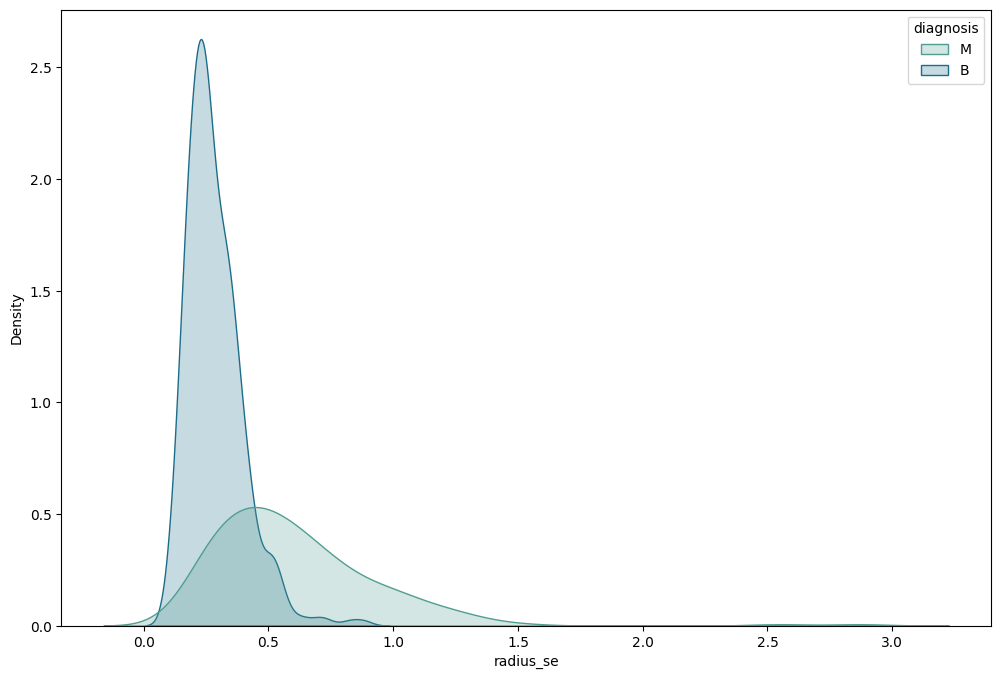

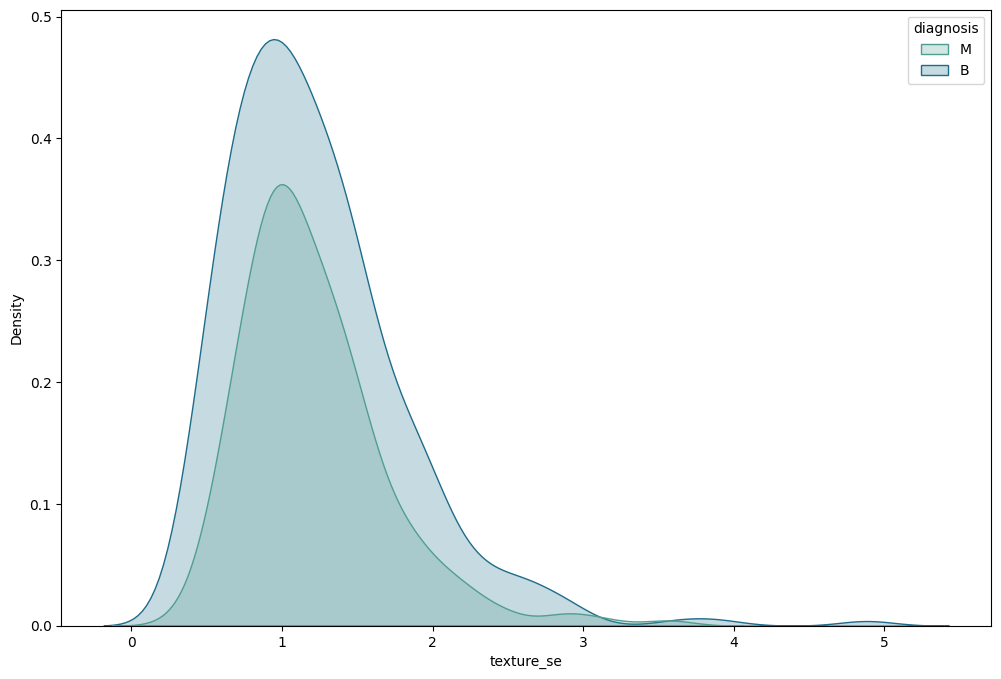

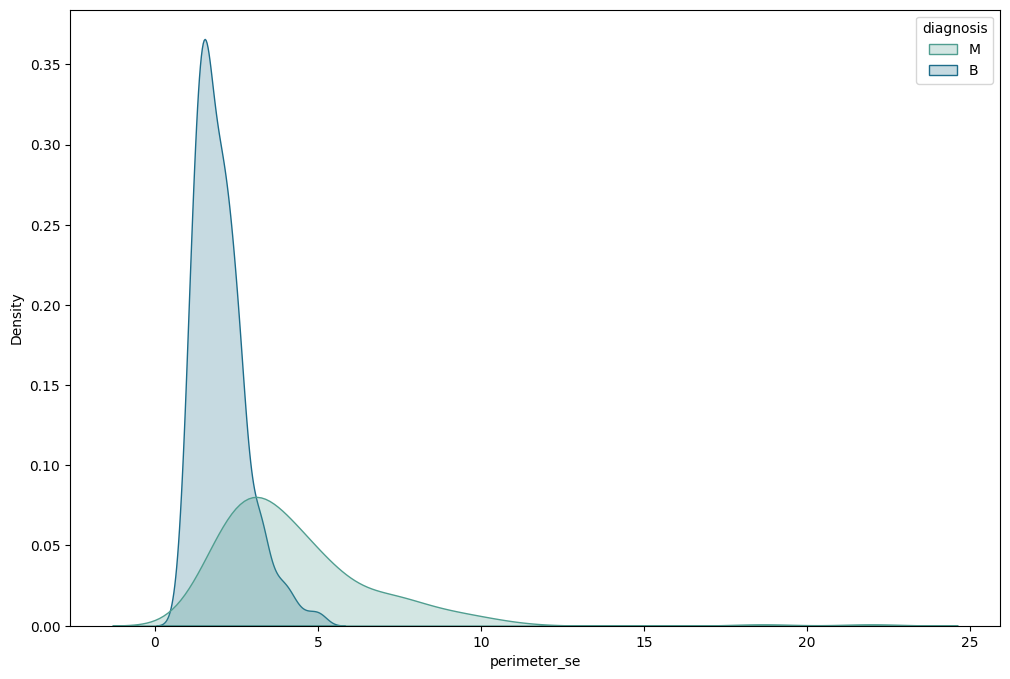

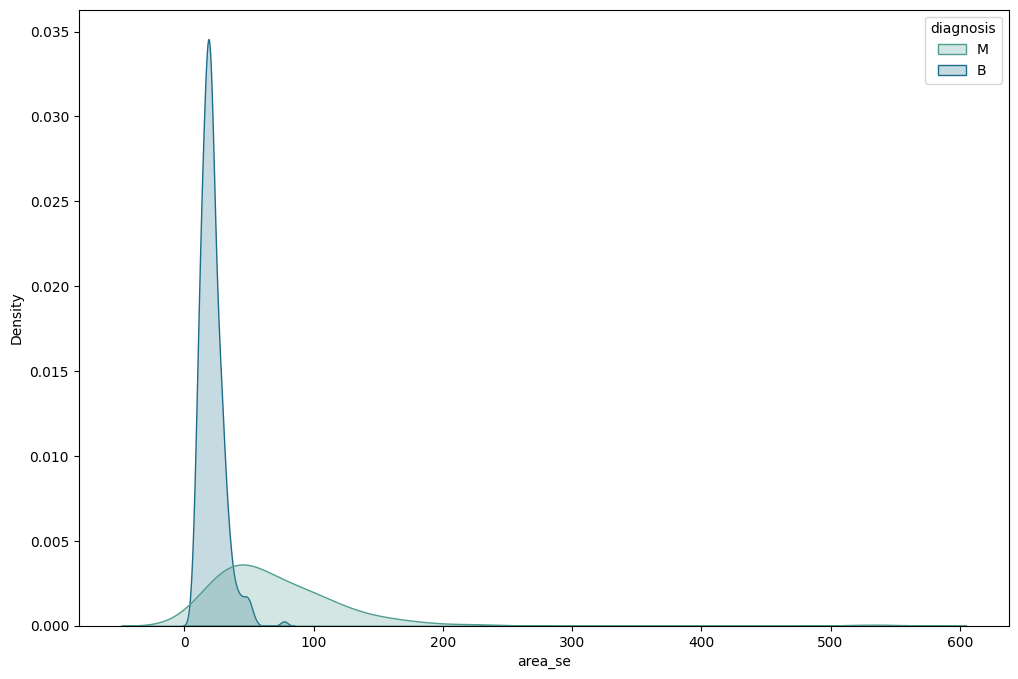

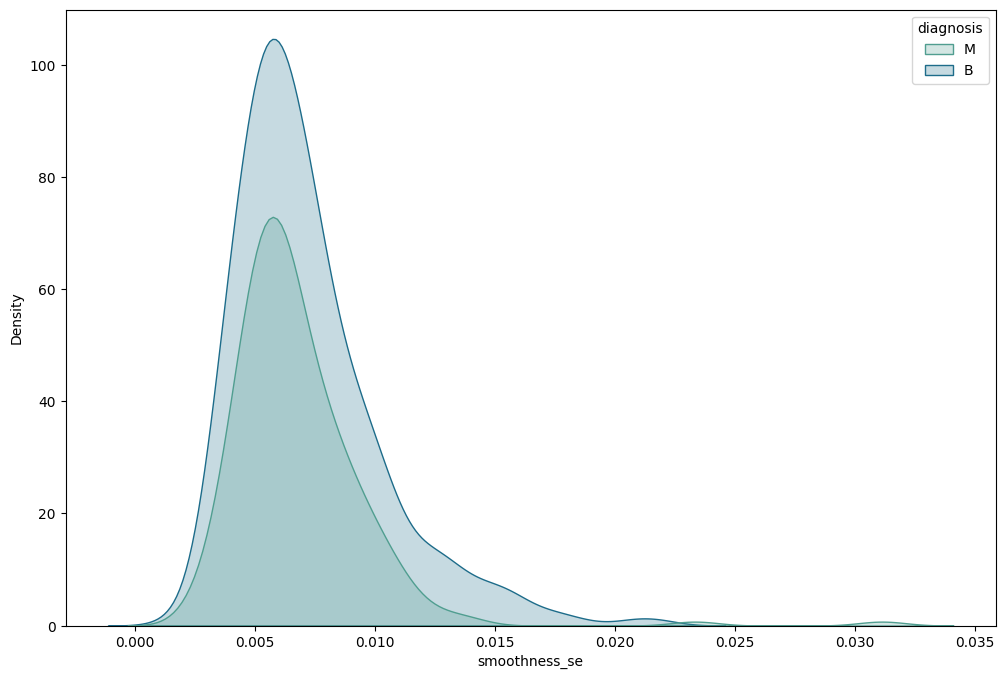

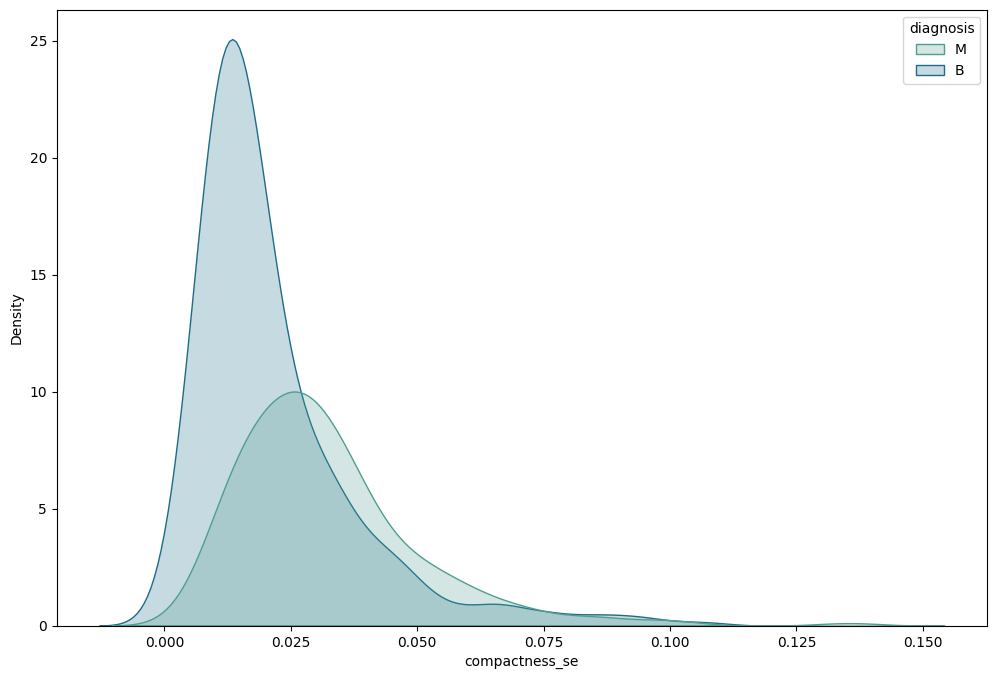

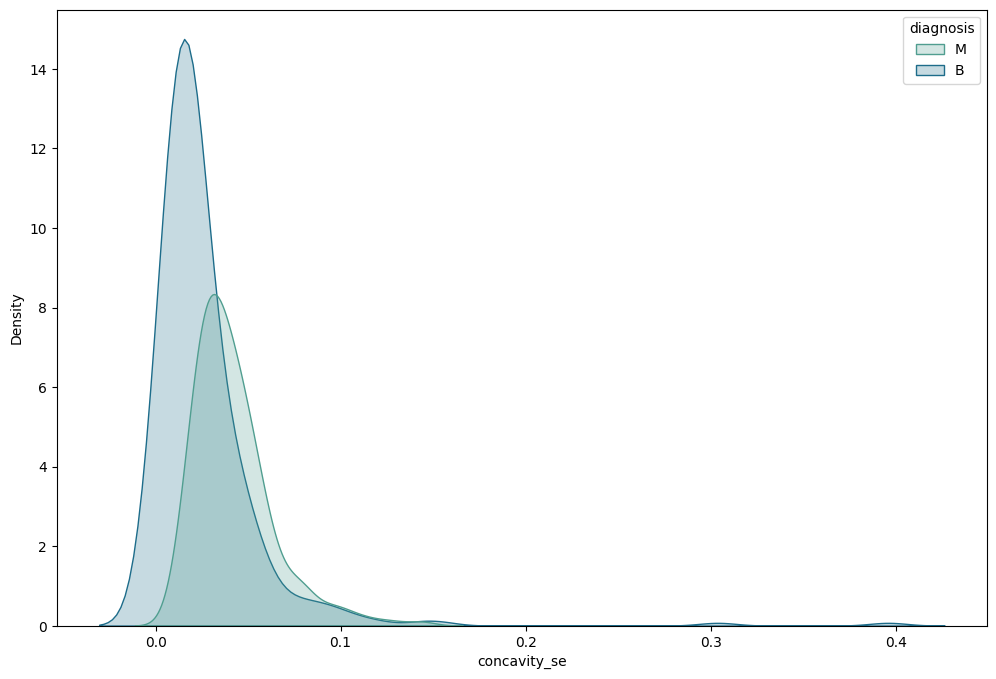

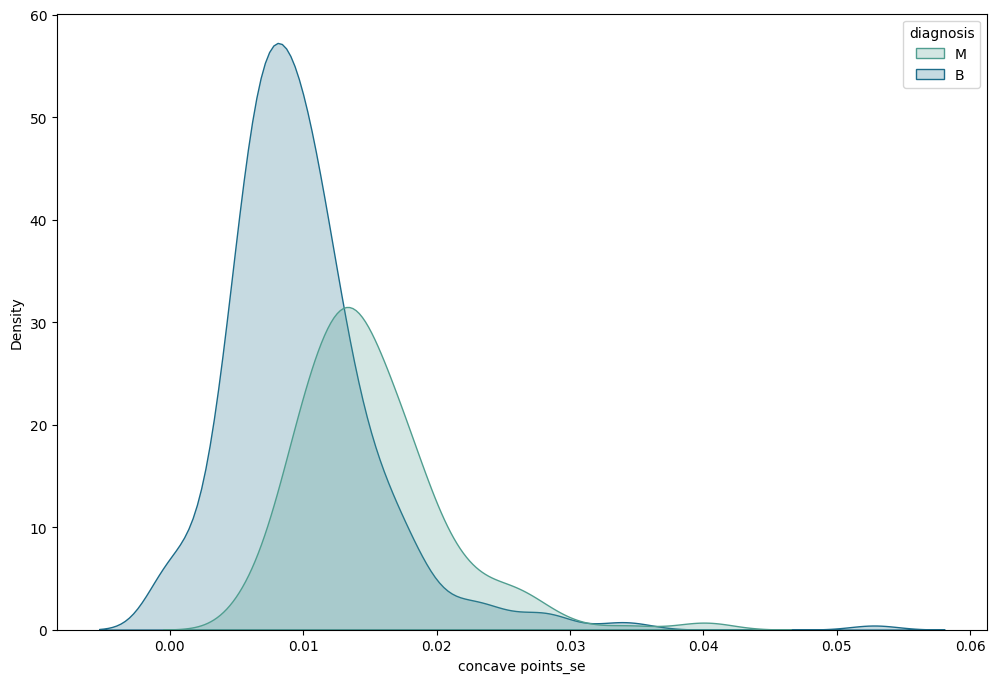

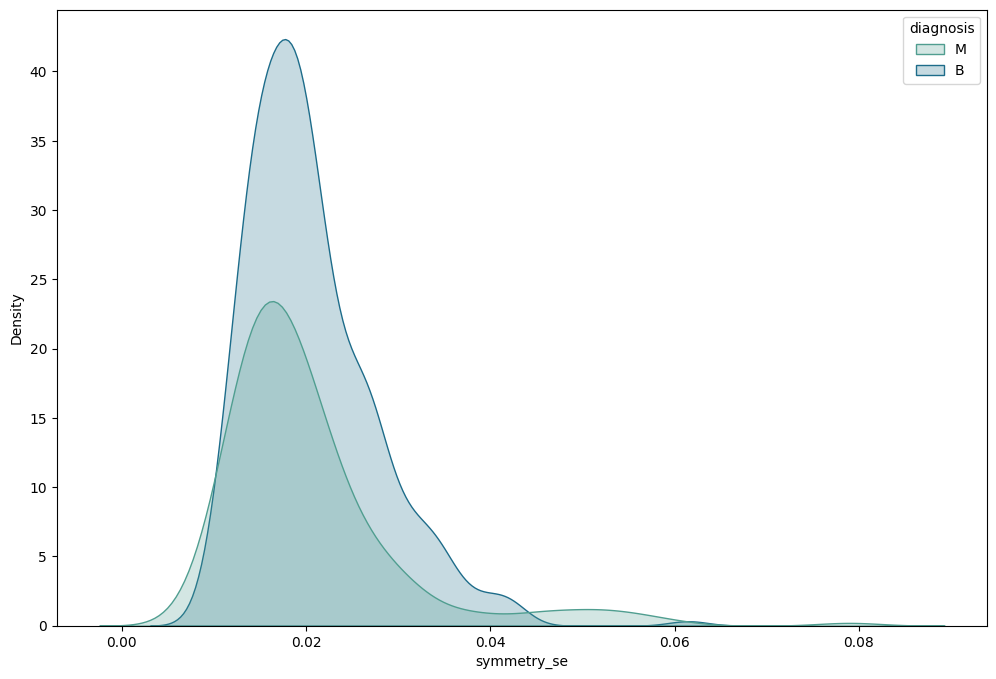

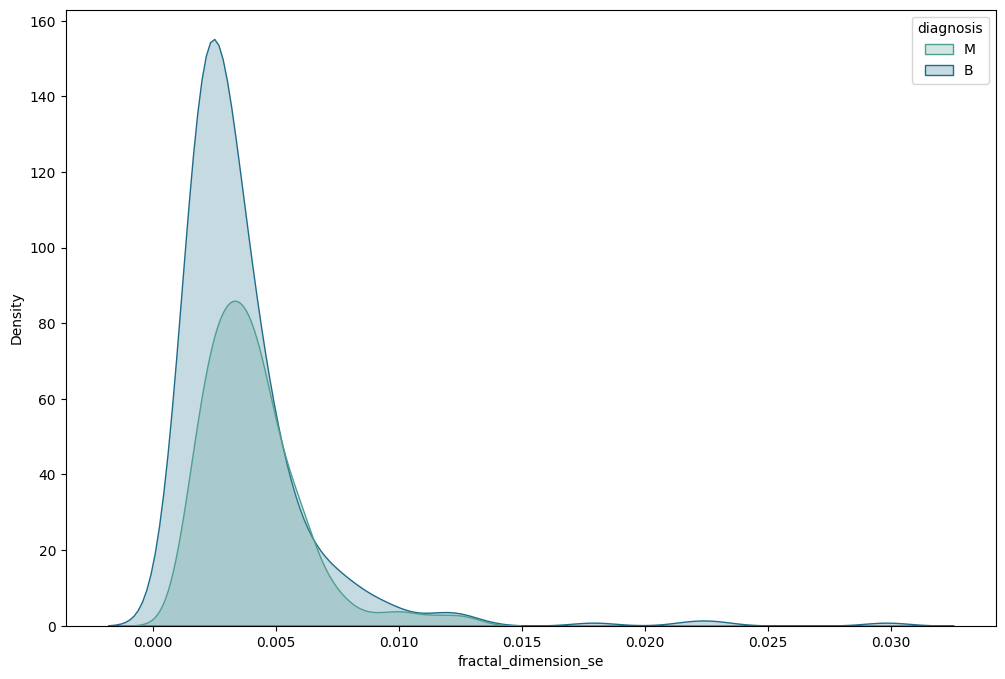

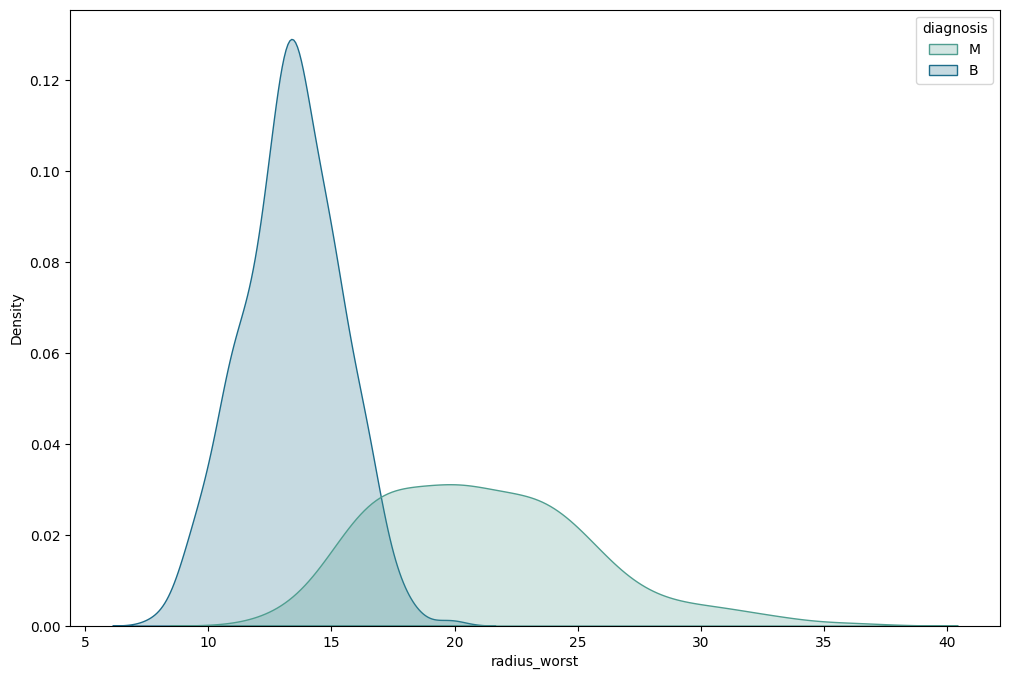

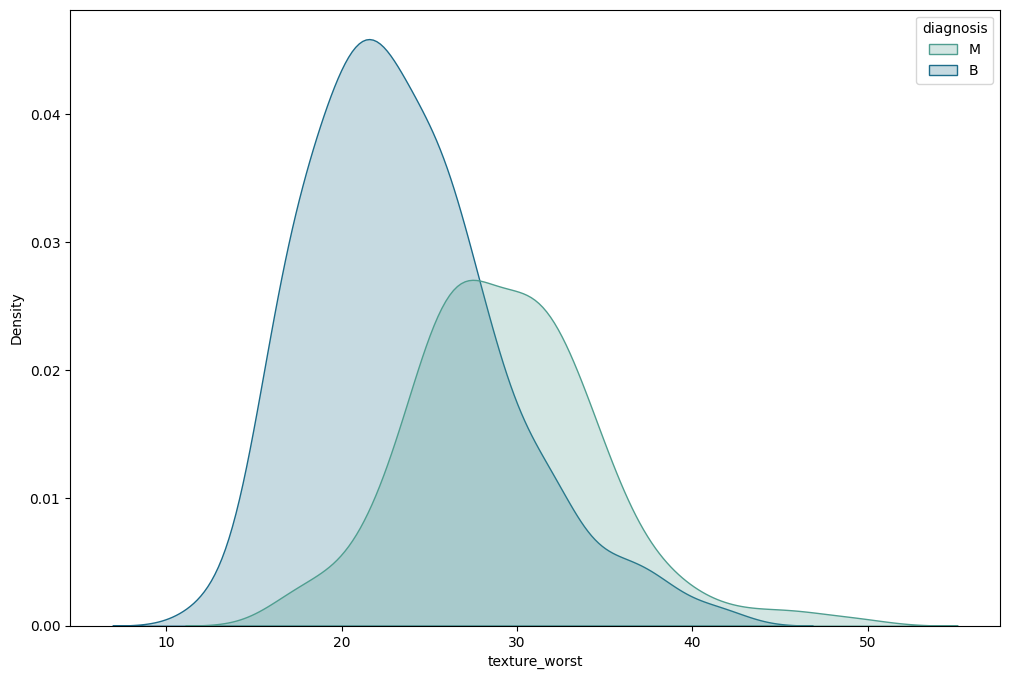

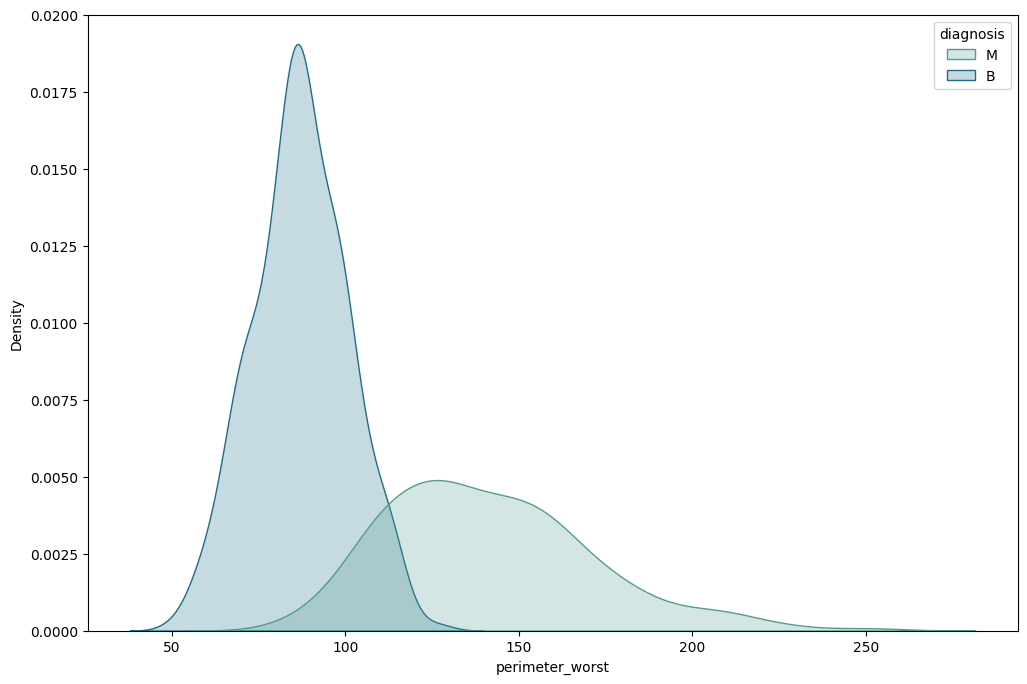

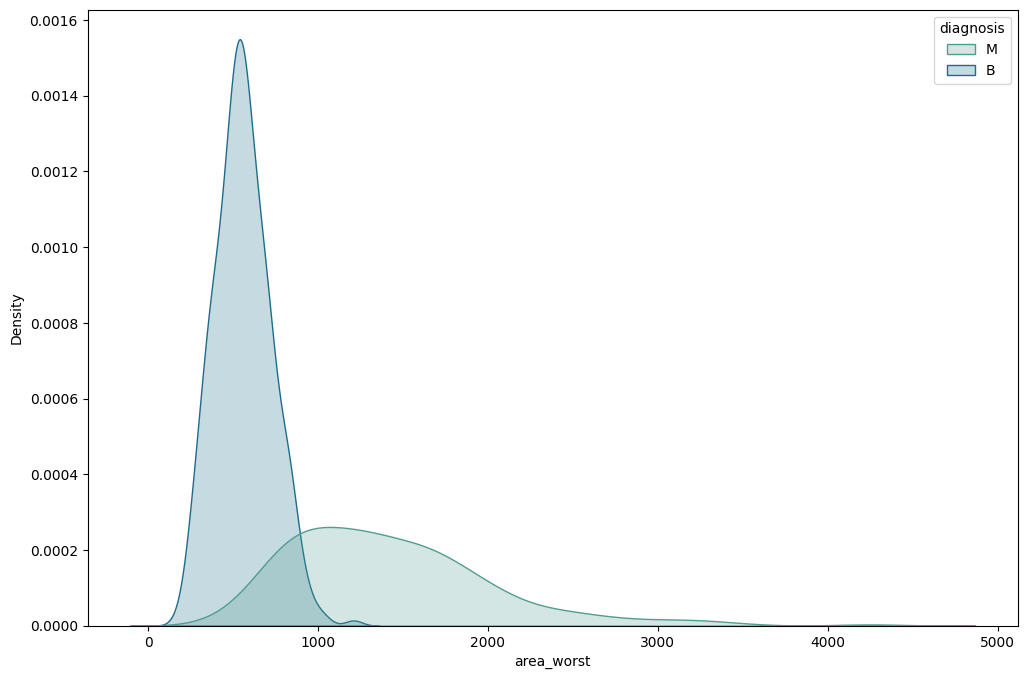

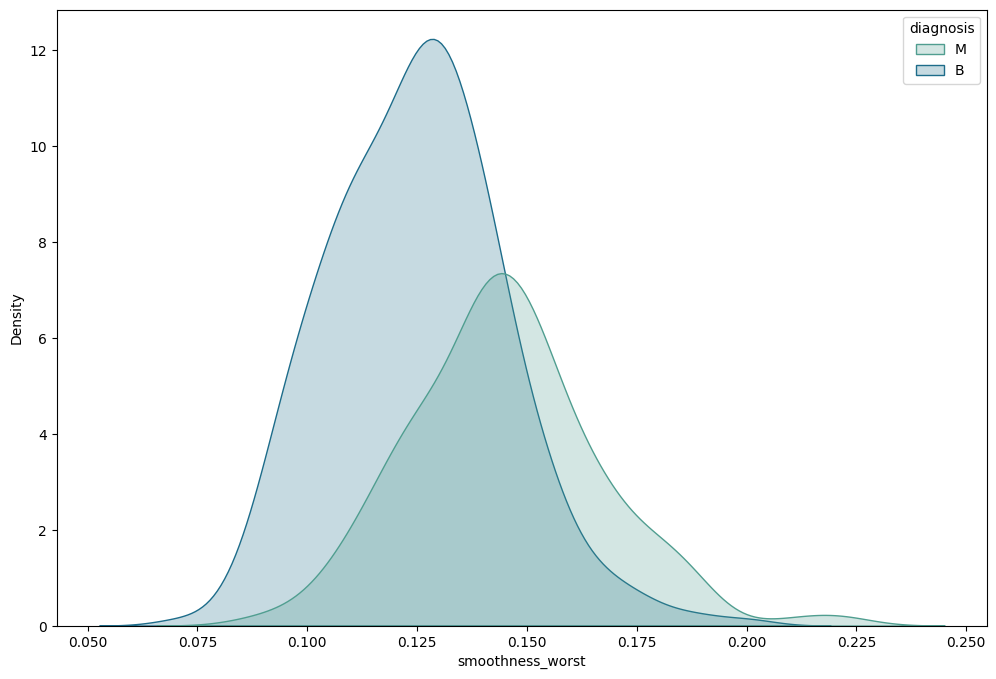

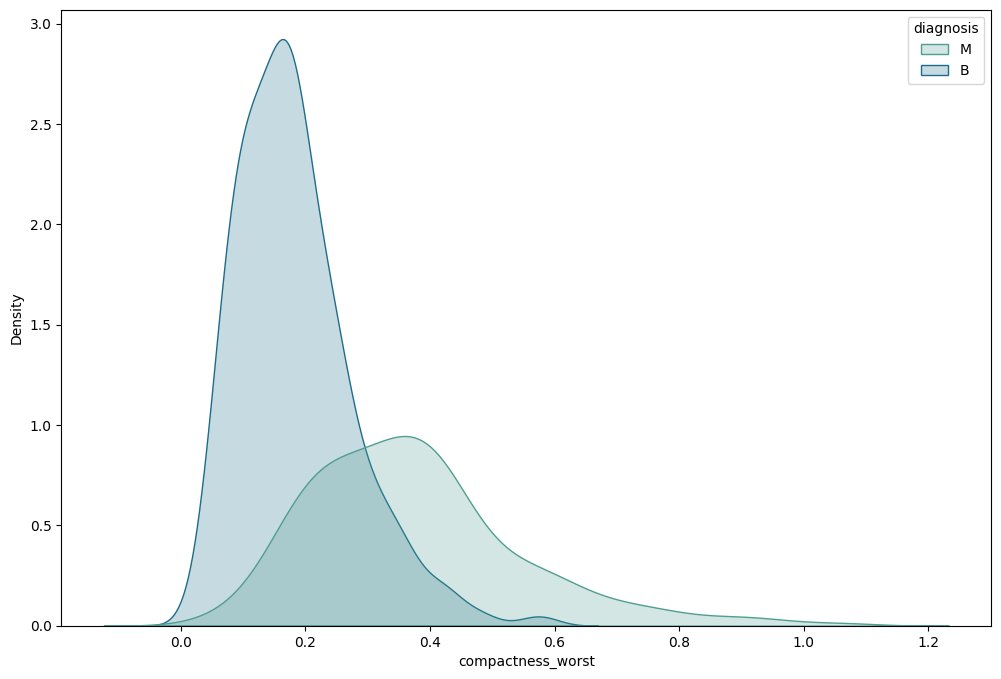

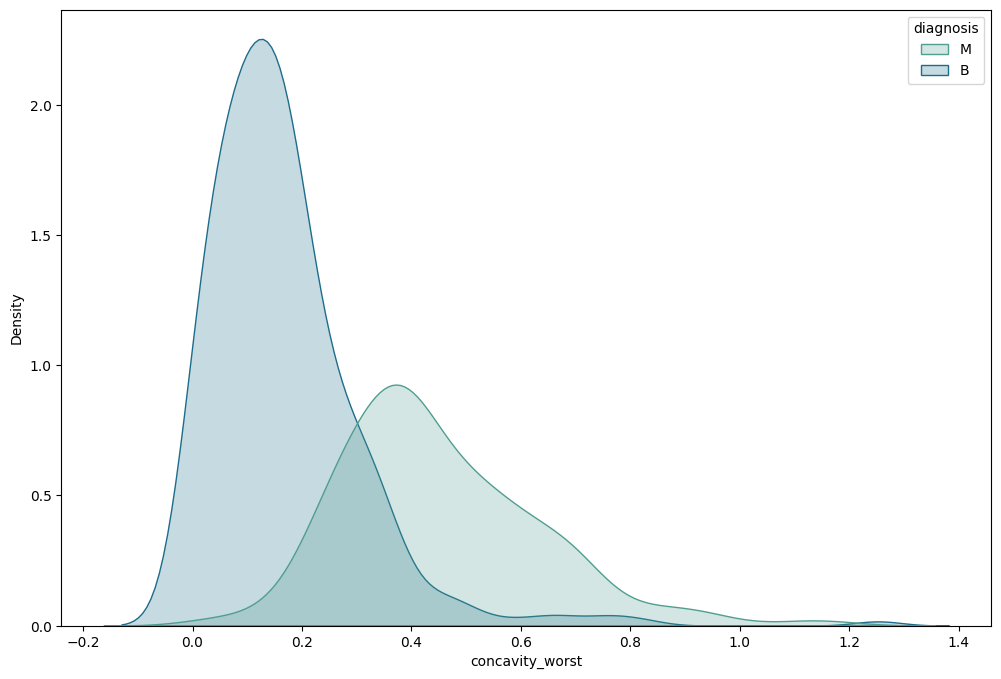

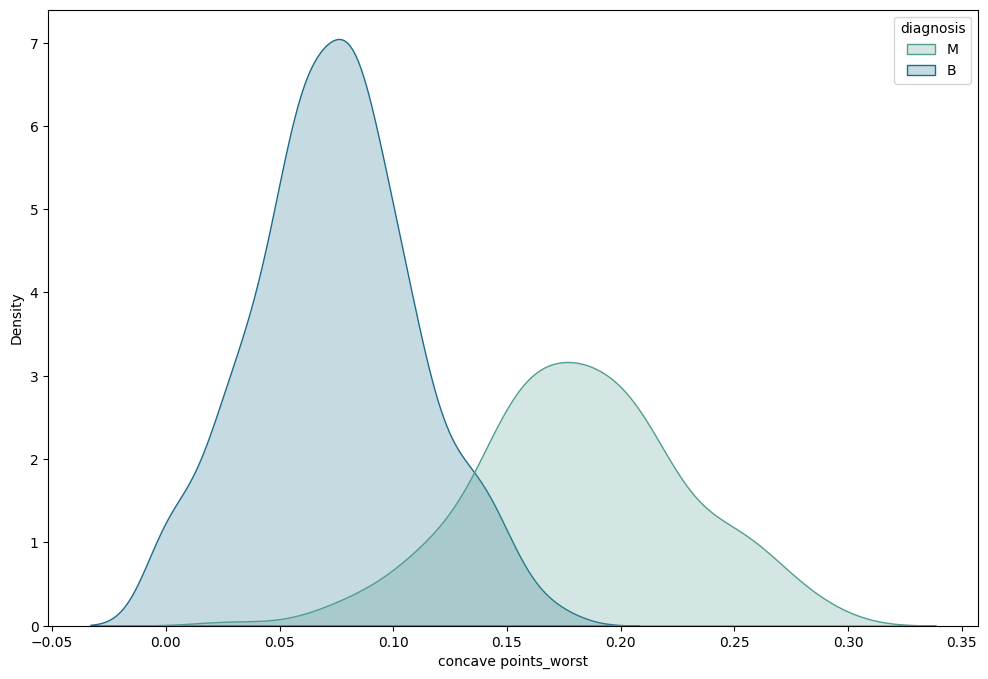

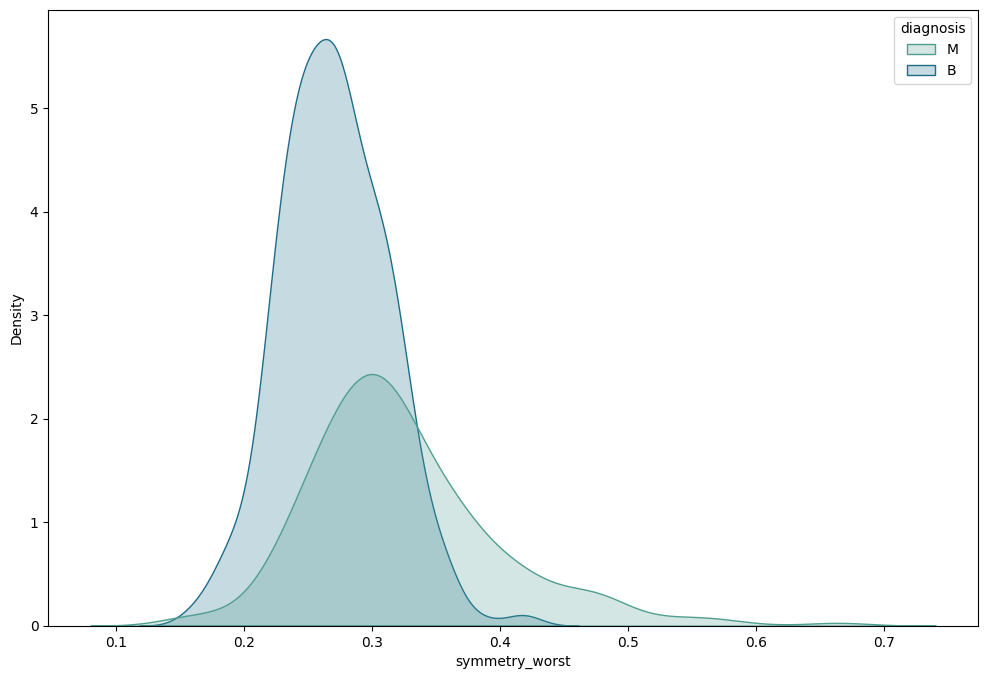

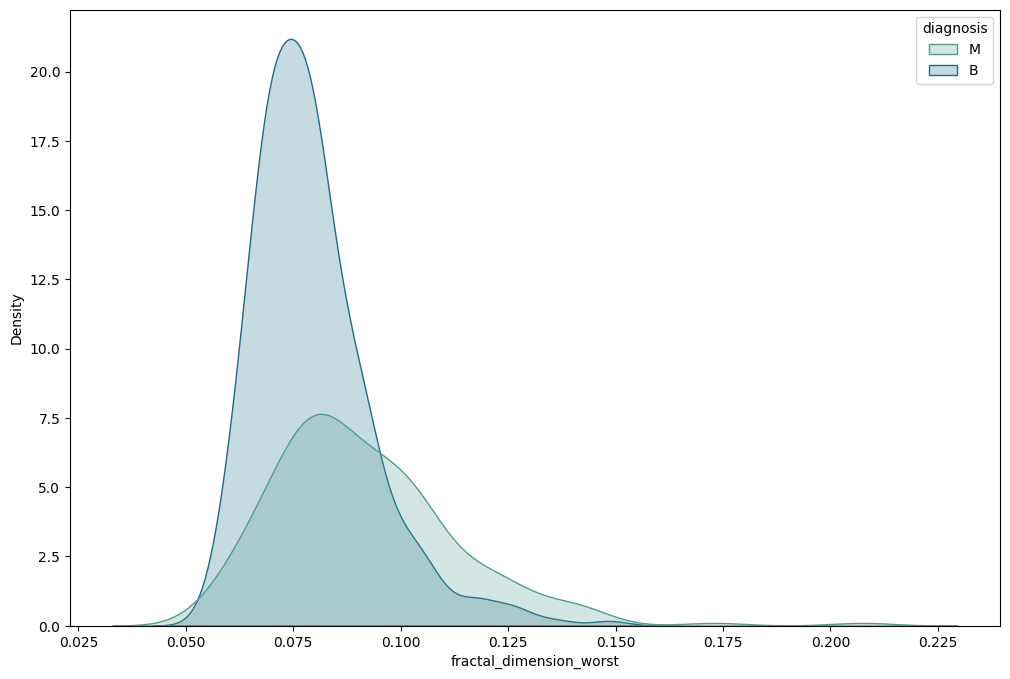

In [14]:
for column in numeric_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=project_data, x=column, hue='diagnosis', palette="crest", fill=True)
    plt.show()

## Correlation Analysis

<Axes: >

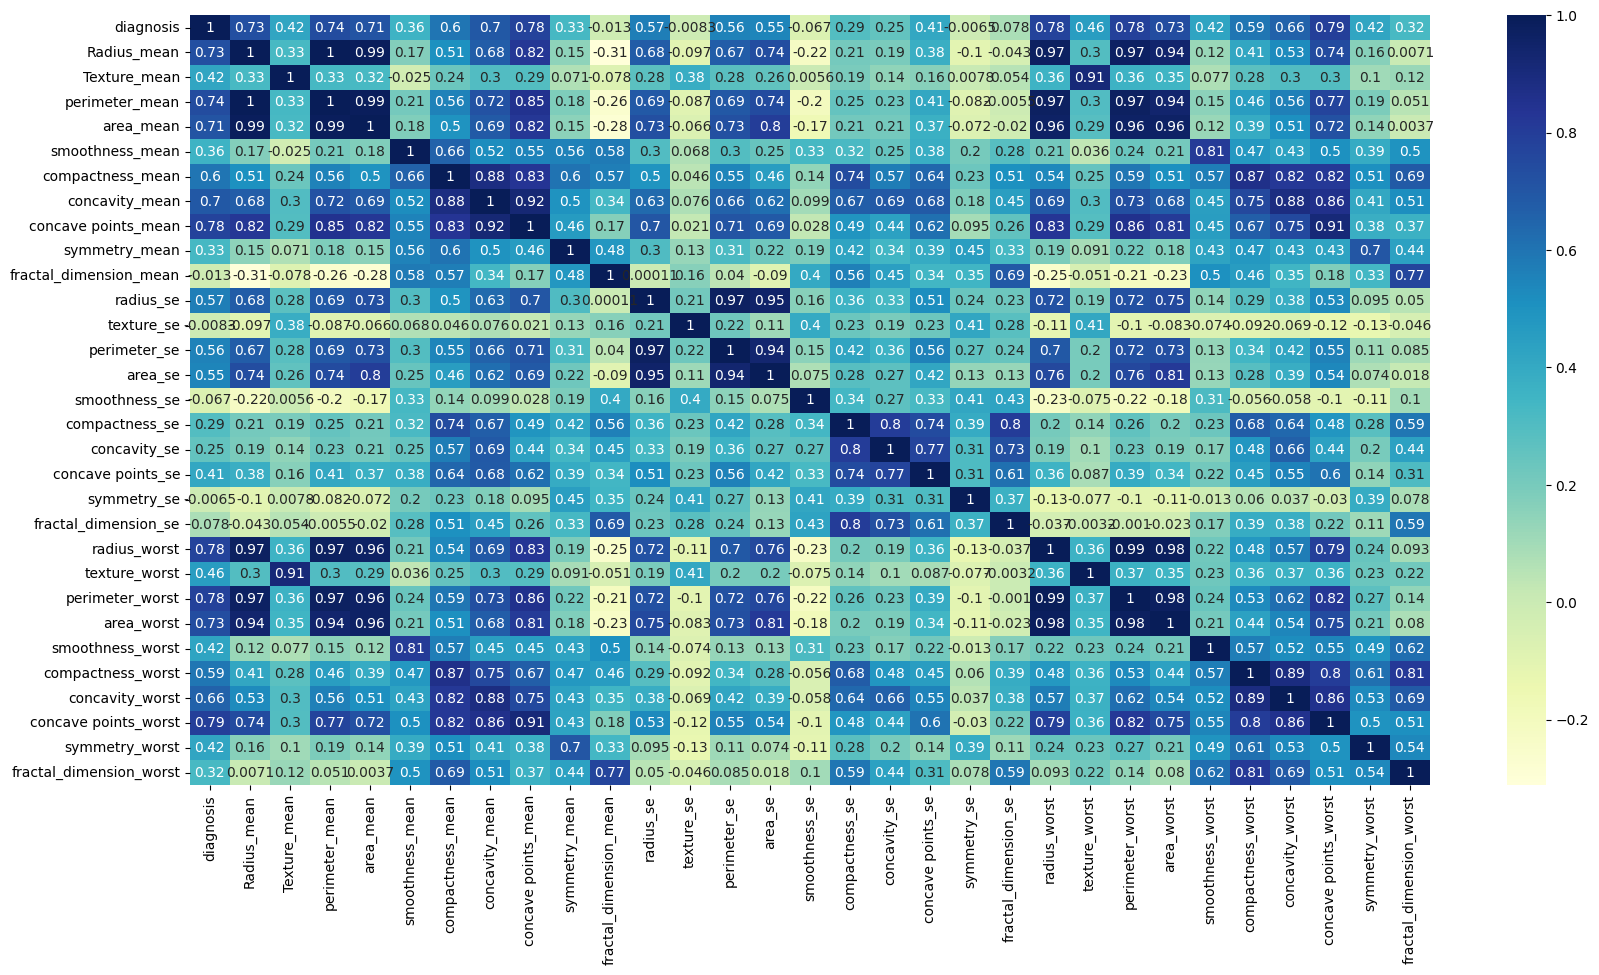

In [17]:
# Convert 'diagnosis' column to numeric representation using mapping.
project_data['diagnosis'] = project_data['diagnosis'].map({'M': 1, 'B': 0})

plt.figure(figsize=(20,10))
corr = project_data.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

## Data Preprocessing and Pipelining

In [18]:
X_train=project_data.drop(columns=["diagnosis"])
y_train=project_data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [19]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (455, 30)
Test dataset shape (455,)


In [20]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
****************************************************************************************************
Index([], dtype='object')


In [21]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Radius_mean', 'Texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture...
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index([], dtype='object'))])

## Generic Methods for Model Preparation & Metric Evaliation

In [22]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

In [23]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12,8))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix');

In [24]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

In [25]:
def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

## Model Preparation

In [26]:
algorithms = [('bagging classifier', BaggingClassifier()),
              ('KNN classifier', KNeighborsClassifier()),
              ('Random Forest calssifier', RandomForestClassifier()),
              ('Adaboost classifier', AdaBoostClassifier()),
              ('Gradientboot classifier',GradientBoostingClassifier()),
              ('MLP', MLPClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

## Model Evaluation

In [27]:
print(model_and_score)

{'bagging classifier': '100.0%', 'KNN classifier': '96.7032967032967%', 'Random Forest calssifier': '100.0%', 'Adaboost classifier': '99.34065934065934%', 'Gradientboot classifier': '99.78021978021978%', 'MLP': '95.38461538461539%'}


bagging classifier


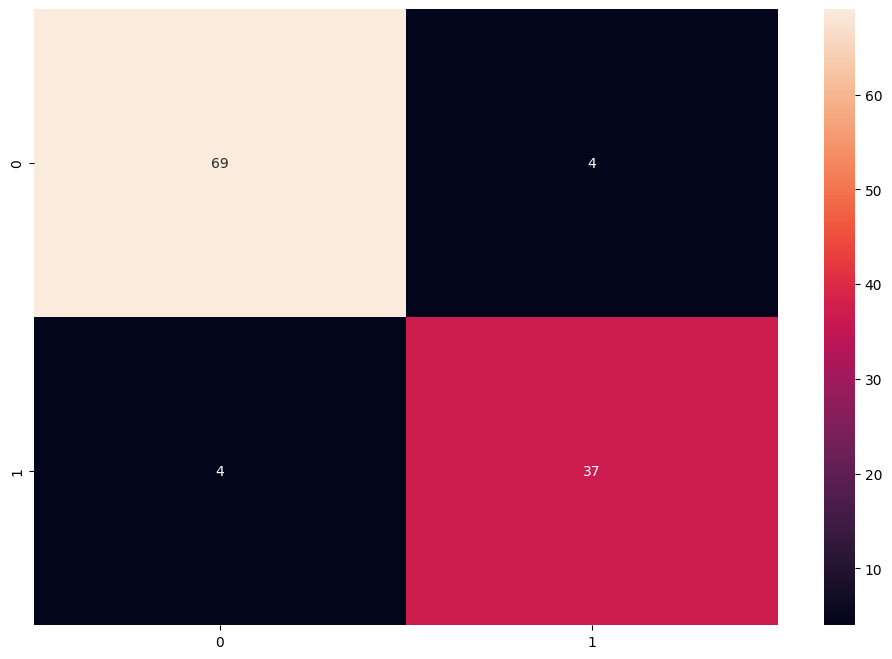

KNN classifier


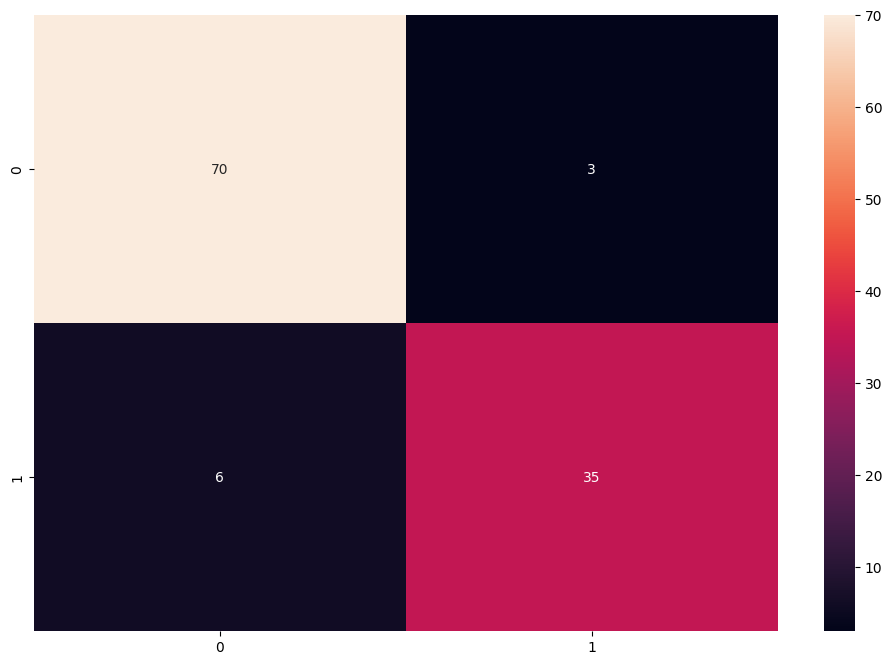

Random Forest calssifier


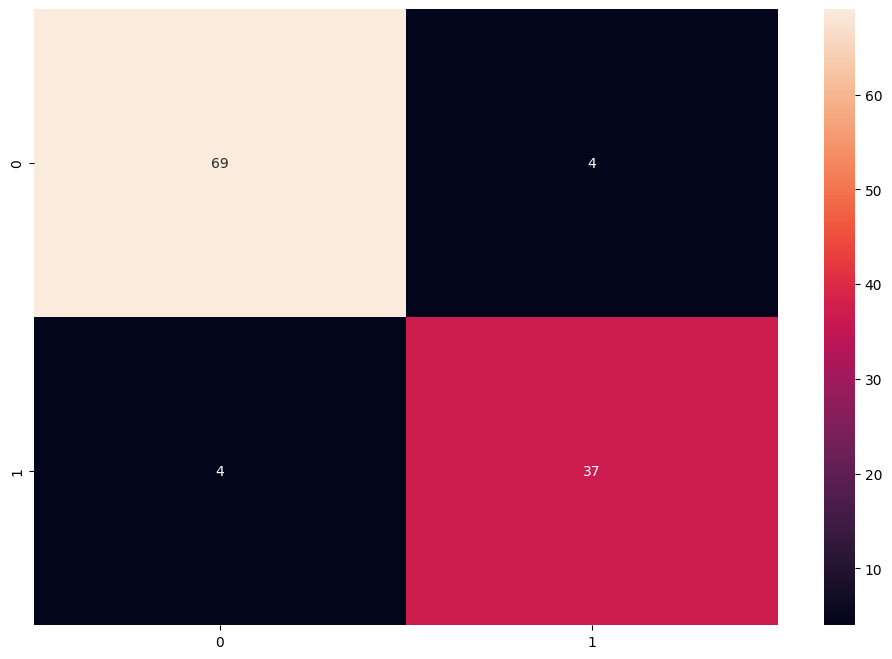

Adaboost classifier


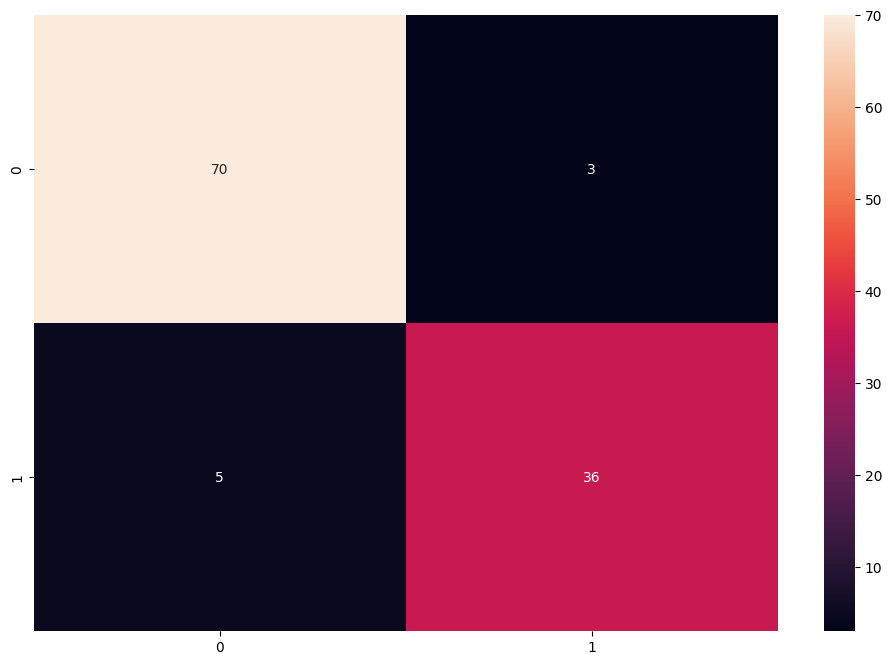

Gradientboot classifier


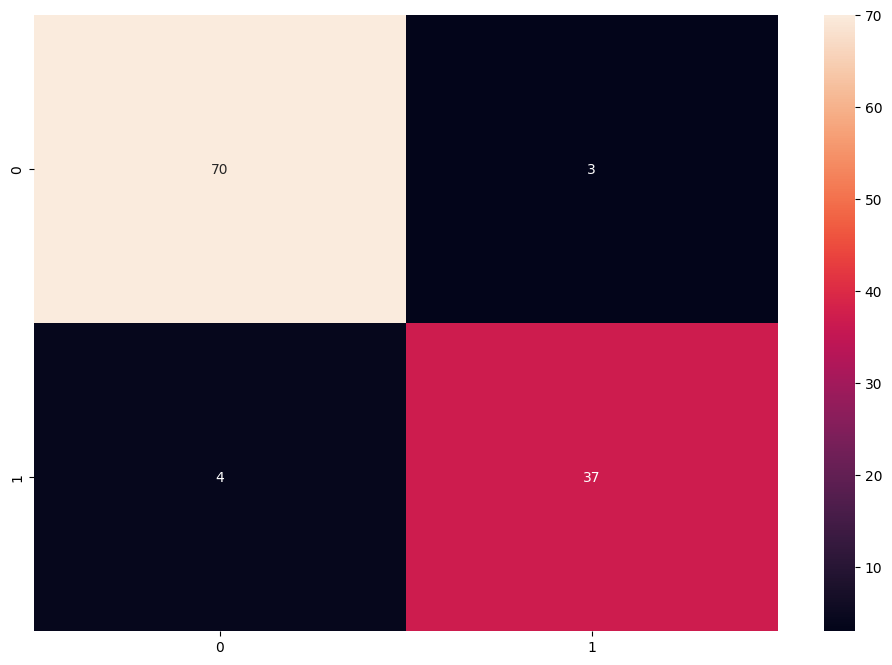

MLP


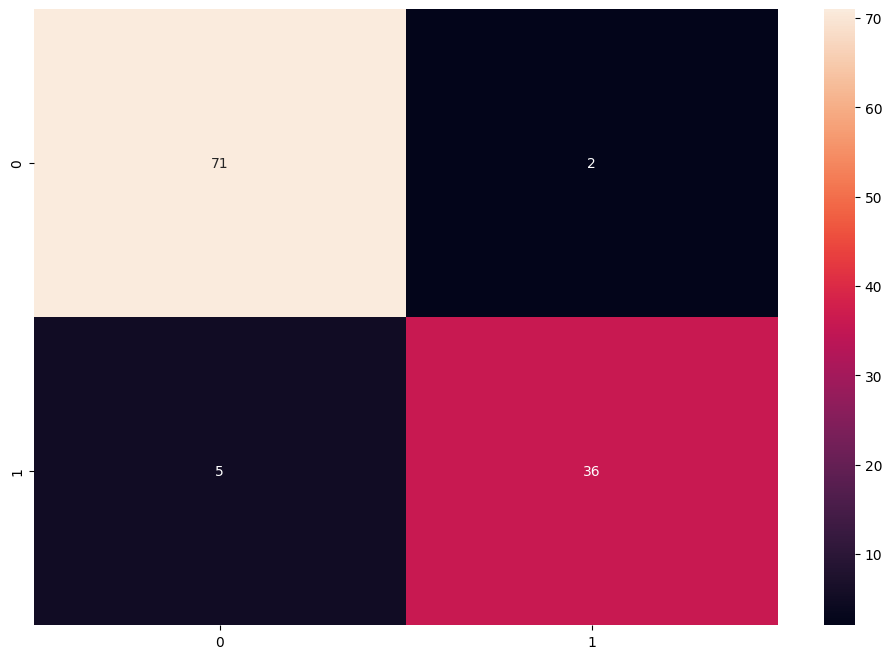

In [28]:
for index, tup in enumerate(trained_models):
    prepare_confusion_matrix(tup[0], tup[1])

In [29]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

bagging classifier Report :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.90      0.90      0.90        41

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



KNN classifier Report :
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.92      0.85      0.89        41

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



Random Forest calssifier Report :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.90      0.90      0.90        41

    accuracy                           0.93       114
   macro avg       0.92      0.92     

bagging classifier


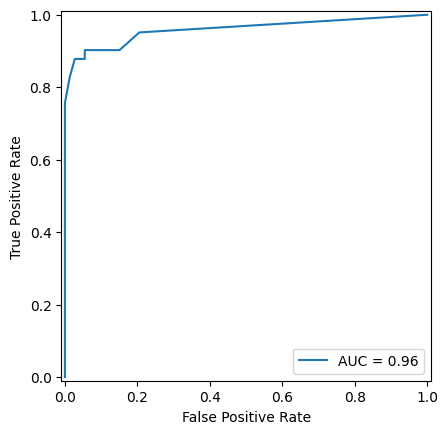

KNN classifier


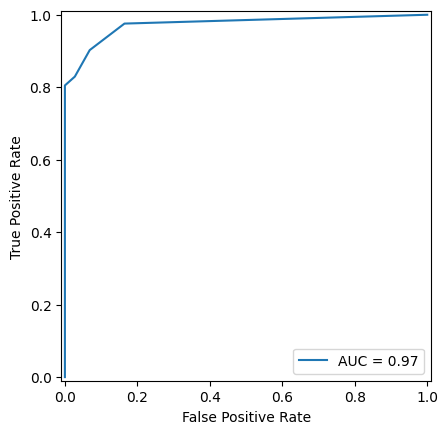

Random Forest calssifier


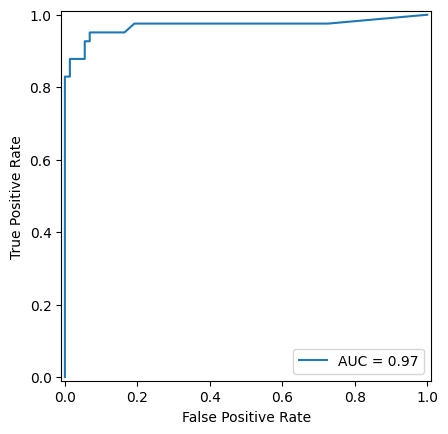

Adaboost classifier


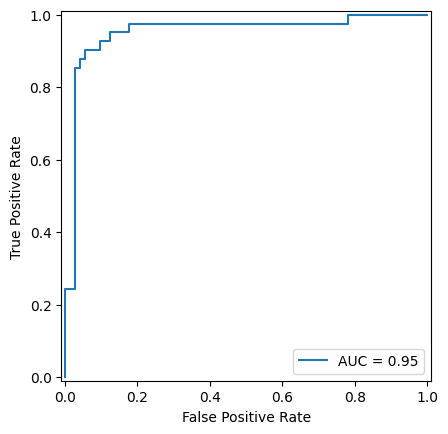

Gradientboot classifier


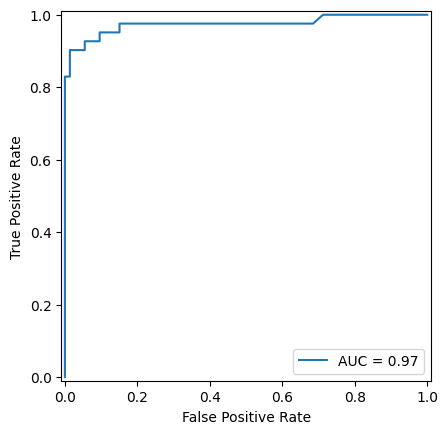

MLP


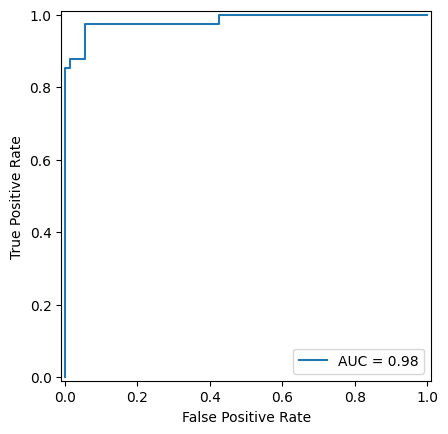

In [30]:
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)

for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1])

## Summary Of the Analysis

In [31]:
from prettytable import PrettyTable

x = PrettyTable(["Model", "Train Accuracy", "AUC SCORE"])
x.add_row(["bagging classifier","99.56","0.97"])
x.add_row(["KNN classifier","95.82","0.97"])
x.add_row(["Random Forest calssifier","100","0.97"])
x.add_row(["Adaboost classifier","100","0.96"])
x.add_row(["Gradientboot classifier","100","0.97"])
x.add_row(["MLP Classifier","96.92","0.98"])
print(x)

+--------------------------+----------------+-----------+
|          Model           | Train Accuracy | AUC SCORE |
+--------------------------+----------------+-----------+
|    bagging classifier    |     99.56      |    0.97   |
|      KNN classifier      |     95.82      |    0.97   |
| Random Forest calssifier |      100       |    0.97   |
|   Adaboost classifier    |      100       |    0.96   |
| Gradientboot classifier  |      100       |    0.97   |
|      MLP Classifier      |     96.92      |    0.98   |
+--------------------------+----------------+-----------+


* On the whole we select the algorithm that is have good AUC score and training accuracy
    Gradientboot classifier, Random Forest calssifier

Credits:
* https://www.medicalnewstoday.com/articles/327488#symptoms
* https://www.mayoclinic.org/diseases-conditions/breast-cancer/symptoms-causes/syc-20352470

In [43]:
!pip install gradio

In [36]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00


In [46]:
!pip install streamlit
!pip install pyngrok


In [53]:
!pip install streamlit pyngrok


In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import gradio as gr

# Load the dataset
data = pd.read_csv('data.csv')

# Prepare features and labels
X = data[['Radius_mean', 'Texture_mean', 'perimeter_mean']]
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Convert to binary: Malignant = 1, Benign = 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Only transform testing data

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Define prediction function
def predict(radius_mean, texture_mean, perimeter_mean):
    input_data = np.array([[radius_mean, texture_mean, perimeter_mean]])
    input_data_scaled = scaler.transform(input_data)  # Scale the input
    probability = model.predict_proba(input_data_scaled)[0][1]  # Probability of being malignant
    prediction = "Malignant" if probability >= 0.5 else "Benign"

    # Return formatted result
    result = f"Prediction: {prediction}\nProbability of Malignancy: {round(probability * 100, 2)}%"
    return result, round(probability, 2)  # Return rounded probability

# Create Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label="Radius Mean"),  # Removed default
        gr.Number(label="Texture Mean"),  # Removed default
        gr.Number(label="Perimeter Mean")  # Removed default
    ],
    outputs=["text", "number"],
    title="Breast Cancer Prediction",
    description="Enter the following measurements to predict whether the tumor is Benign or Malignant."
)

# Launch the Gradio interface
iface.launch()


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[68  3]
 [ 2 41]]
Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://954128cfa31578c537.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [63]:
# Test predictions in the model
test_cases = [
    {"radius_mean": 21.0, "texture_mean": 24.0, "perimeter_mean": 130.0},  # Expected Malignant
    {"radius_mean": 12.0, "texture_mean": 14.0, "perimeter_mean": 80.0}    # Expected Benign
]

for case in test_cases:
    prediction, probability = predict(case["radius_mean"], case["texture_mean"], case["perimeter_mean"])
    print(f"Inputs: {case} => Prediction: {prediction}, Probability: {probability:.2f}")


Inputs: {'radius_mean': 21.0, 'texture_mean': 24.0, 'perimeter_mean': 130.0} => Prediction: Benign, Probability: 0.00
Inputs: {'radius_mean': 12.0, 'texture_mean': 14.0, 'perimeter_mean': 80.0} => Prediction: Benign, Probability: 0.98
